<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [3]:

# إزالة القيم الفارغة
df_comp = df[['ConvertedCompYearly']].dropna()


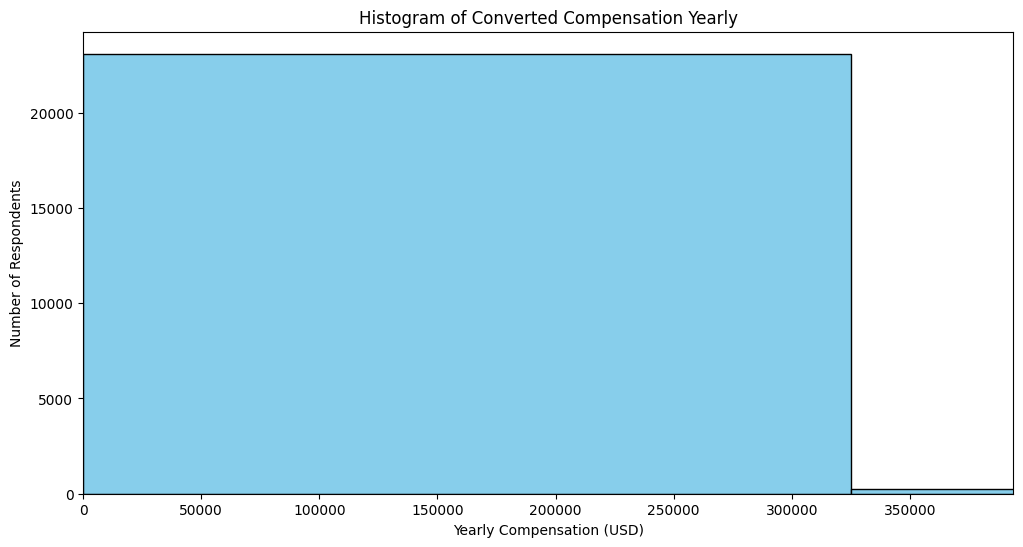

In [4]:
plt.figure(figsize=(12,6))
plt.hist(df_comp['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Converted Compensation Yearly")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Number of Respondents")
plt.xlim(0, df_comp['ConvertedCompYearly'].quantile(0.99))  # لتجنب تأثير القيم الشاذة الكبيرة
plt.show()


/tmp/ipython-input-1258060489.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_comp['ConvertedCompYearly'], shade=True, color='orange')


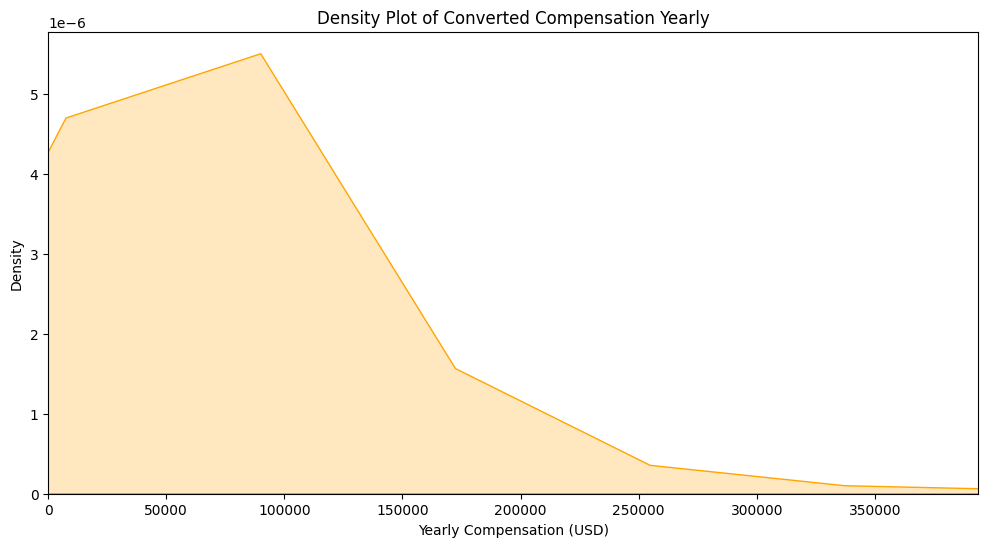

In [5]:
plt.figure(figsize=(12,6))
sns.kdeplot(df_comp['ConvertedCompYearly'], shade=True, color='orange')
plt.title("Density Plot of Converted Compensation Yearly")
plt.xlabel("Yearly Compensation (USD)")
plt.xlim(0, df_comp['ConvertedCompYearly'].quantile(0.99))
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [6]:
# إزالة القيم الفارغة في ConvertedCompYearly و Employment
df_ft = df[['ConvertedCompYearly', 'Employment']].dropna()

# فلترة الموظفين بدوام كامل
df_ft = df_ft[df_ft['Employment'] == "Employed, full-time"]


In [7]:
median_comp_fulltime = df_ft['ConvertedCompYearly'].median()
print(f"Median yearly compensation for full-time employees: ${median_comp_fulltime:,.2f}")


Median yearly compensation for full-time employees: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [8]:

# إزالة القيم الفارغة في العمودين Country و ConvertedCompYearly
df_country = df[['ConvertedCompYearly', 'Country']].dropna()


In [9]:
# أعلى 10 دول بعدد المستجيبين
top_countries = df_country['Country'].value_counts().head(10).index
df_top_countries = df_country[df_country['Country'].isin(top_countries)]


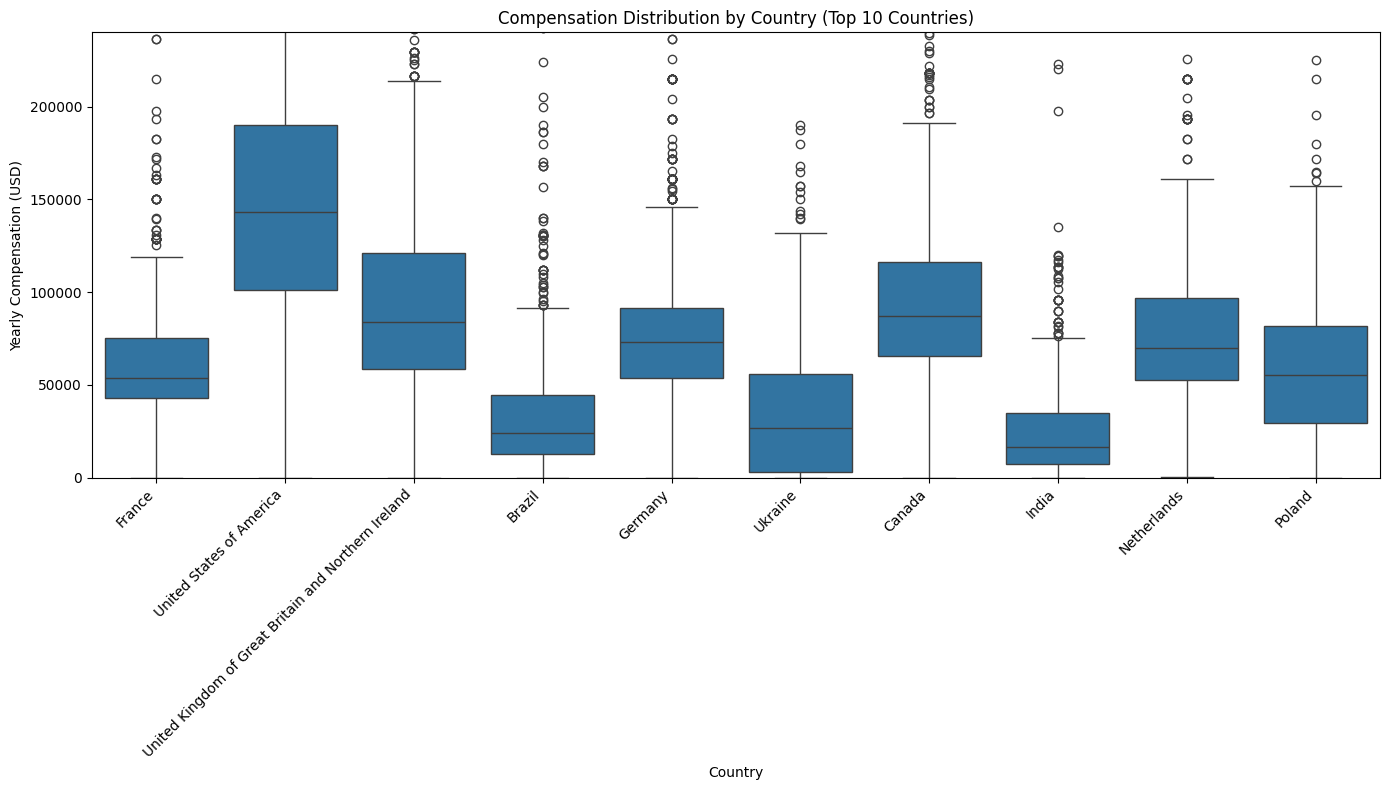

In [10]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries)
plt.ylim(0, df_top_countries['ConvertedCompYearly'].quantile(0.95))  # لتقليل تأثير Outliers الكبيرة
plt.title("Compensation Distribution by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Yearly Compensation (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [11]:
# إزالة القيم الفارغة أولًا
df_clean = df[['ConvertedCompYearly']].dropna()


In [12]:
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Lower bound: -80177.25, Upper bound: 220860.75


In [13]:
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) &
                    (df['ConvertedCompYearly'] <= upper_bound)].copy()


In [14]:
print(f"Original DataFrame size: {df.shape[0]}")
print(f"New DataFrame size (without outliers): {df_no_outliers.shape[0]}")
print(f"Number of removed outliers: {df.shape[0] - df_no_outliers.shape[0]}")


Original DataFrame size: 65437
New DataFrame size (without outliers): 22457
Number of removed outliers: 42980


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [15]:
# اختيار الأعمدة المطلوبة وإزالة القيم الفارغة
df_corr = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()


In [16]:
correlation_matrix = df_corr.corr()
print(correlation_matrix)


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.153182        0.020156
WorkExp                         0.153182  1.000000       -0.028839
JobSatPoints_1                  0.020156 -0.028839        1.000000


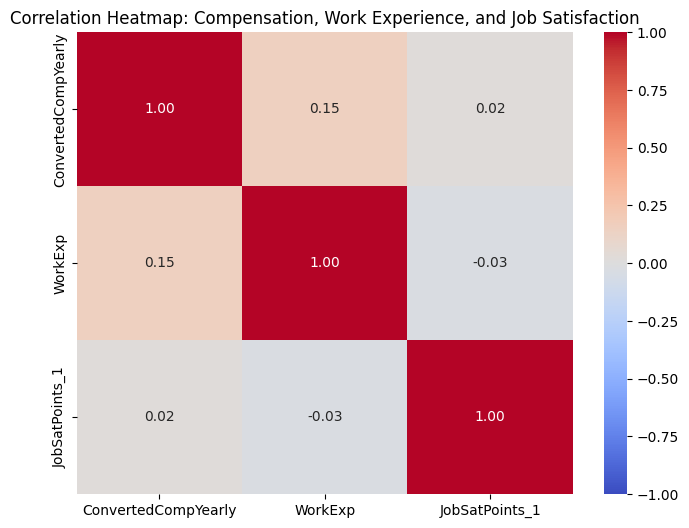

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction")
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


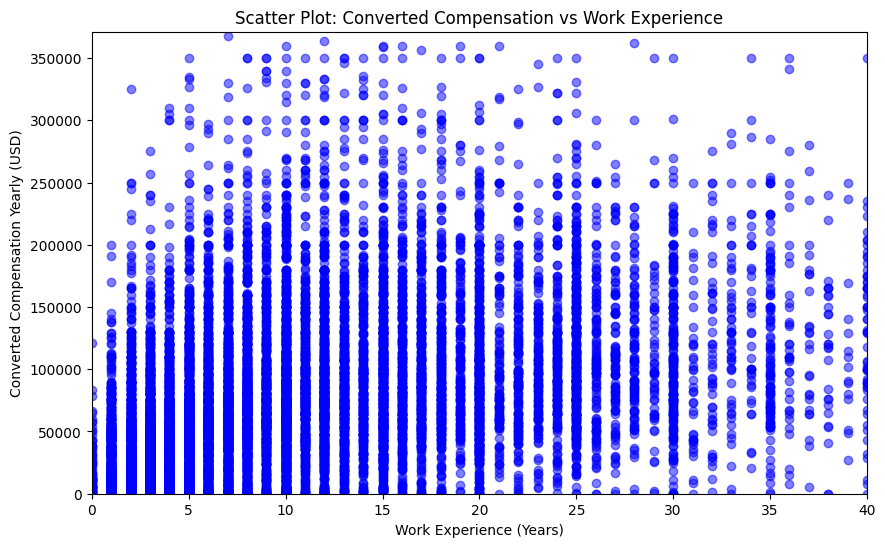

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(df_corr['WorkExp'], df_corr['ConvertedCompYearly'], alpha=0.5, color='blue')
plt.title("Scatter Plot: Converted Compensation vs Work Experience")
plt.xlabel("Work Experience (Years)")
plt.ylabel("Converted Compensation Yearly (USD)")
plt.xlim(0, df_corr['WorkExp'].quantile(0.99))  # لتقليل تأثير القيم الشاذة الكبيرة
plt.ylim(0, df_corr['ConvertedCompYearly'].quantile(0.99))
plt.show()


Copyright © IBM Corporation. All rights reserved.
